# Обработаем исходые данные

### Получим данные

In [395]:
import pandas as pd
train = pd.read_csv("train.csv")
train

,ClientPeriod,MonthlySpending,TotalSpent,Sex,IsSeniorCitizen,HasPartner,HasChild,HasPhoneService,HasMultiplePhoneNumbers,HasInternetService,HasOnlineSecurityService,HasOnlineBackup,HasDeviceProtection,HasTechSupportAccess,HasOnlineTV,HasMovieSubscription,HasContractPhone,IsBillingPaperless,PaymentMethod,Churn
0,55,19.50,1026.35,Male,0,Yes,Yes,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check,0
1,72,25.85,1872.2,Male,0,Yes,No,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),0
2,1,75.90,75.9,Male,0,No,No,Yes,No,Fiber optic,No,No,No,Yes,No,No,Month-to-month,Yes,Electronic check,1
3,32,79.30,2570,Female,1,Yes,No,Yes,Yes,Fiber optic,No,No,Yes,No,No,No,Month-to-month,No,Mailed check,0
4,60,115.25,6758.45,Female,0,Yes,Yes,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Two year,No,Credit card (automatic),0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5277,3,30.40,82.15,Male,0,No,No,No,No phone service,DSL,No,No,No,Yes,No,No,Month-to-month,No,Electronic check,0
5278,50,44.45,2188.45,Male,0,Yes,No,No,No phone service,DSL,Yes,No,No,Yes,Yes,No,One year,Yes,Bank transfer (automatic),0
5279,1,55.05,55.05,Male,0,No,No,Yes,No,DSL,No,No,Yes,Yes,No,No,Month-to-month,No,Mailed check,0
5280,29,76.00,2215.25,Female,0,No,No,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Credit card (automatic),0


In [396]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5282 entries, 0 to 5281
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ClientPeriod              5282 non-null   int64  
 1   MonthlySpending           5282 non-null   float64
 2   TotalSpent                5282 non-null   object 
 3   Sex                       5282 non-null   object 
 4   IsSeniorCitizen           5282 non-null   int64  
 5   HasPartner                5282 non-null   object 
 6   HasChild                  5282 non-null   object 
 7   HasPhoneService           5282 non-null   object 
 8   HasMultiplePhoneNumbers   5282 non-null   object 
 9   HasInternetService        5282 non-null   object 
 10  HasOnlineSecurityService  5282 non-null   object 
 11  HasOnlineBackup           5282 non-null   object 
 12  HasDeviceProtection       5282 non-null   object 
 13  HasTechSupportAccess      5282 non-null   object 
 14  HasOnlin

Как видим, пропущенных значений нет

### Получим описательную статистику

In [397]:
train.describe()

,ClientPeriod,MonthlySpending,IsSeniorCitizen,Churn
count,5282.000000,5282.000000,5282.000000,5282.000000
mean,32.397009,64.924754,0.159409,0.262022
std,24.550326,30.176464,0.366092,0.439776
min,0.000000,18.250000,0.000000,0.000000
25%,9.000000,35.462500,0.000000,0.000000
50%,29.000000,70.400000,0.000000,0.000000
75%,55.000000,90.050000,0.000000,1.000000
max,72.000000,118.750000,1.000000,1.000000


### Проверяем каждый принзак на наличие аномалий

In [398]:
train.value_counts("ClientPeriod")


ClientPeriod
1     457
72    284
2     165
3     162
4     136
     ... 
57     39
39     35
36     34
44     34
0       9
Name: count, Length: 73, dtype: int64

In [399]:
train.value_counts("MonthlySpending")

MonthlySpending
20.05     46
19.65     35
19.95     34
20.00     33
19.80     32
          ..
71.45      1
71.50      1
71.55      1
71.60      1
118.75     1
Name: count, Length: 1468, dtype: int64

array([[<Axes: title={'center': 'MonthlySpending'}>]], dtype=object)

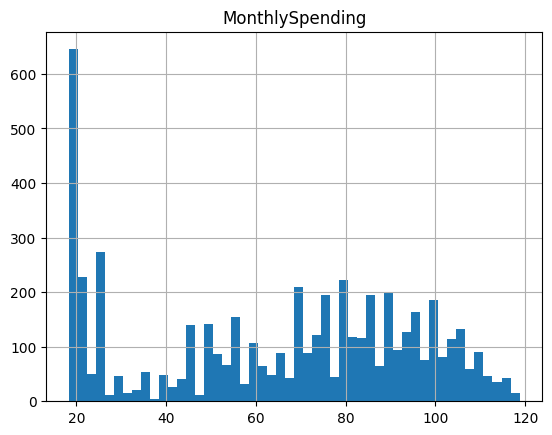

In [400]:
train.hist("MonthlySpending", bins=50)

In [401]:
mean_spending = train["MonthlySpending"].mean()
mean_spending

64.92475388110564

In [402]:
median_spending = train["MonthlySpending"].quantile()
median_spending

70.4

Численные признаки не имеют аномальных значений

Можем убрать признак TotalSpent, так как он линейно зависит от MonthlySpending и ClientPeriod

In [403]:
train.drop("TotalSpent", axis=1, inplace=True)
train

,ClientPeriod,MonthlySpending,Sex,IsSeniorCitizen,HasPartner,HasChild,HasPhoneService,HasMultiplePhoneNumbers,HasInternetService,HasOnlineSecurityService,HasOnlineBackup,HasDeviceProtection,HasTechSupportAccess,HasOnlineTV,HasMovieSubscription,HasContractPhone,IsBillingPaperless,PaymentMethod,Churn
0,55,19.50,Male,0,Yes,Yes,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check,0
1,72,25.85,Male,0,Yes,No,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),0
2,1,75.90,Male,0,No,No,Yes,No,Fiber optic,No,No,No,Yes,No,No,Month-to-month,Yes,Electronic check,1
3,32,79.30,Female,1,Yes,No,Yes,Yes,Fiber optic,No,No,Yes,No,No,No,Month-to-month,No,Mailed check,0
4,60,115.25,Female,0,Yes,Yes,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Two year,No,Credit card (automatic),0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5277,3,30.40,Male,0,No,No,No,No phone service,DSL,No,No,No,Yes,No,No,Month-to-month,No,Electronic check,0
5278,50,44.45,Male,0,Yes,No,No,No phone service,DSL,Yes,No,No,Yes,Yes,No,One year,Yes,Bank transfer (automatic),0
5279,1,55.05,Male,0,No,No,Yes,No,DSL,No,No,Yes,Yes,No,No,Month-to-month,No,Mailed check,0
5280,29,76.00,Female,0,No,No,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Credit card (automatic),0


### Посмотрим распределение числовых признаков

array([[<Axes: title={'center': 'ClientPeriod'}>,
        <Axes: title={'center': 'MonthlySpending'}>],
       [<Axes: title={'center': 'IsSeniorCitizen'}>,
        <Axes: title={'center': 'Churn'}>]], dtype=object)

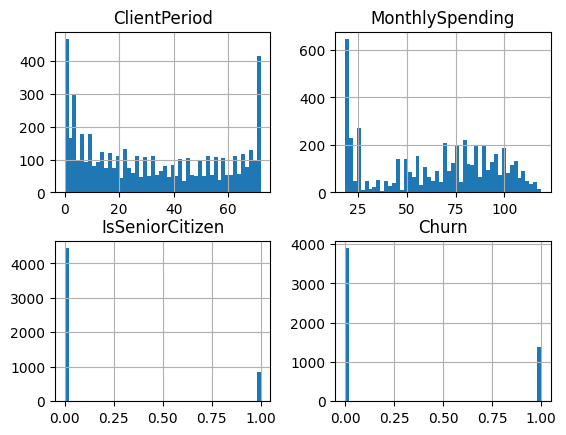

In [404]:
train.hist(bins=50) 

Заметим, что у целевого признака churn есть дисбаланс явный. Используем это в логистической регрессии

### Нормализуем числовые признаки(one-hot)(СЕЙЧАС УХУДШАЕТ КАЧЕСТВО ОТВЕТОВ ВСЕХ МОДЕЛЕЙ, кроме knn)

In [405]:
# from sklearn.preprocessing import StandardScaler

# cols_to_scale = train.columns[:2]

# scaler = StandardScaler()
# scaled_vals = scaler.fit_transform(train[cols_to_scale])

# scaled_df = pd.DataFrame(scaled_vals, columns=cols_to_scale, index=train.index)

# train[cols_to_scale] = scaled_df
# train


# Обработка категориальных признаков

### Покажем распределение для категориальных признаков(частотный анализ)

In [406]:
%matplotlib inline 
import matplotlib.pyplot as plt

In [407]:
train_columns = train.columns
for i, column in enumerate(train_columns):
    if i<2 or i>17: # чтобы убрать числовые признаки
        continue
    print(train[column].value_counts())
    print()

Sex
Male      2655
Female    2627
Name: count, dtype: int64

IsSeniorCitizen
0    4440
1     842
Name: count, dtype: int64

HasPartner
No     2705
Yes    2577
Name: count, dtype: int64

HasChild
No     3676
Yes    1606
Name: count, dtype: int64

HasPhoneService
Yes    4761
No      521
Name: count, dtype: int64

HasMultiplePhoneNumbers
No                  2511
Yes                 2250
No phone service     521
Name: count, dtype: int64

HasInternetService
Fiber optic    2341
DSL            1800
No             1141
Name: count, dtype: int64

HasOnlineSecurityService
No                     2612
Yes                    1529
No internet service    1141
Name: count, dtype: int64

HasOnlineBackup
No                     2332
Yes                    1809
No internet service    1141
Name: count, dtype: int64

HasDeviceProtection
No                     2317
Yes                    1824
No internet service    1141
Name: count, dtype: int64

HasTechSupportAccess
No                     2604
Yes         

### Покажем распределение категориальных признаков(круговые диаграммы)

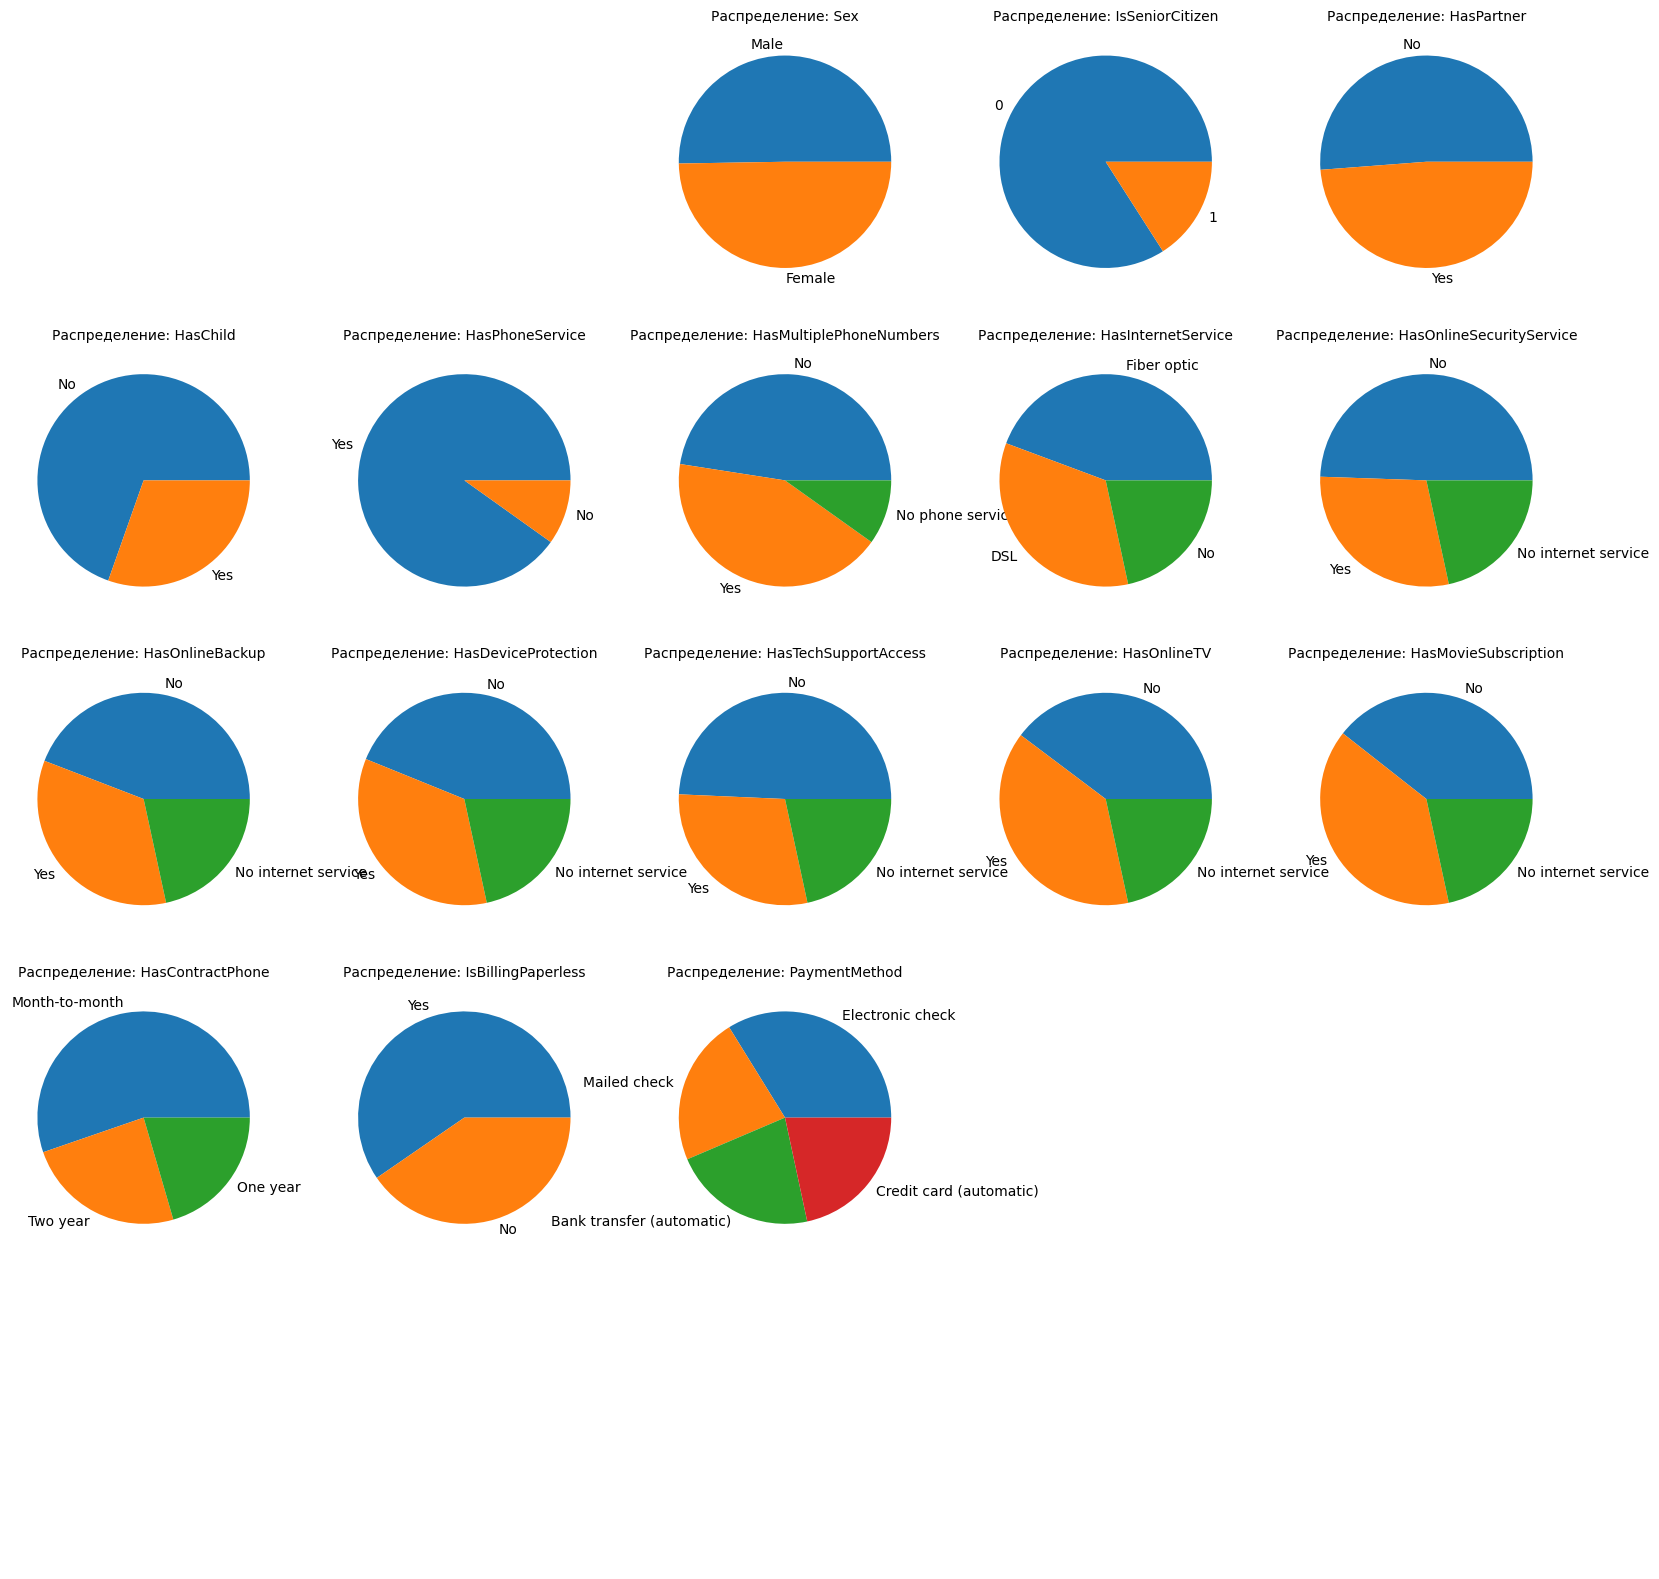

In [408]:
fig, axes = plt.subplots(nrows=5, ncols=5, figsize=(20,20))
axes = axes.flatten()

for i, column in enumerate(train_columns):
    if i<2 or i>17: # числовые признаки чтоб убрать
        continue
    train[column].value_counts().plot.pie(ax=axes[i])
    axes[i].set_title(f'Распределение: {column}', fontsize=10)
    axes[i].set_ylabel('')

for j in range(i, len(axes)):
    axes[j].axis('off')

for k in range(0, 2):
    axes[k].axis("off")

plt.show()

### Теперь, закодируем категориальные признаки(используем метод OneHot)

In [409]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

categorical_cols = train.drop(columns=["Churn"]).select_dtypes(include=["object", "category"]).columns.tolist()

preprocessor = ColumnTransformer(
    transformers=[
        ("cat", OneHotEncoder(handle_unknown="ignore", sparse_output=False), categorical_cols)
    ],
    remainder='passthrough'
)

train_encoded_np = preprocessor.fit_transform(train.drop(columns=["Churn"]))

encoded_feature_names = preprocessor.get_feature_names_out()

train_encoded = pd.DataFrame(train_encoded_np, columns=encoded_feature_names,
                             index=train.index)


train_encoded["Churn"] = train["Churn"]

train_encoded

,cat__Sex_Female,cat__Sex_Male,cat__HasPartner_No,cat__HasPartner_Yes,cat__HasChild_No,cat__HasChild_Yes,cat__HasPhoneService_No,cat__HasPhoneService_Yes,cat__HasMultiplePhoneNumbers_No,cat__HasMultiplePhoneNumbers_No phone service,...,cat__IsBillingPaperless_No,cat__IsBillingPaperless_Yes,cat__PaymentMethod_Bank transfer (automatic),cat__PaymentMethod_Credit card (automatic),cat__PaymentMethod_Electronic check,cat__PaymentMethod_Mailed check,remainder__ClientPeriod,remainder__MonthlySpending,remainder__IsSeniorCitizen,Churn
0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,55.0,19.50,0.0,0
1,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,72.0,25.85,0.0,0
2,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,1.0,75.90,0.0,1
3,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,32.0,79.30,1.0,0
4,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,60.0,115.25,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5277,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,1.0,0.0,3.0,30.40,0.0,0
5278,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,...,0.0,1.0,1.0,0.0,0.0,0.0,50.0,44.45,0.0,0
5279,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,1.0,55.05,0.0,0
5280,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,29.0,76.00,0.0,0


# Обучение моделей

### разделим обучающую выборку на обучающую и контрольную

In [410]:
from sklearn.model_selection import train_test_split

train_x, test_x, train_y, test_y = train_test_split(train_encoded.drop(columns=['Churn']), train_encoded["Churn"], test_size=0.2, shuffle=False)

In [411]:
train_x

,cat__Sex_Female,cat__Sex_Male,cat__HasPartner_No,cat__HasPartner_Yes,cat__HasChild_No,cat__HasChild_Yes,cat__HasPhoneService_No,cat__HasPhoneService_Yes,cat__HasMultiplePhoneNumbers_No,cat__HasMultiplePhoneNumbers_No phone service,...,cat__HasContractPhone_Two year,cat__IsBillingPaperless_No,cat__IsBillingPaperless_Yes,cat__PaymentMethod_Bank transfer (automatic),cat__PaymentMethod_Credit card (automatic),cat__PaymentMethod_Electronic check,cat__PaymentMethod_Mailed check,remainder__ClientPeriod,remainder__MonthlySpending,remainder__IsSeniorCitizen
0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,55.0,19.50,0.0
1,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,...,1.0,1.0,0.0,0.0,1.0,0.0,0.0,72.0,25.85,0.0
2,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,75.90,0.0
3,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,32.0,79.30,1.0
4,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,...,1.0,1.0,0.0,0.0,1.0,0.0,0.0,60.0,115.25,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4220,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,...,1.0,1.0,0.0,0.0,0.0,1.0,0.0,70.0,80.70,0.0
4221,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,5.0,90.35,0.0
4222,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,17.0,54.60,0.0
4223,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,19.0,39.65,0.0


### обучаем модель KNN

In [412]:
from sklearn.neighbors import KNeighborsClassifier

n_neighbors = 20
knn_model = KNeighborsClassifier(n_neighbors=n_neighbors)
knn_model.fit(train_x, train_y)

KNeighborsClassifier(n_neighbors=20)

Получим предсказания модели на тестовой выборке

In [413]:
l= knn_model.predict(test_x)
l


array([0, 1, 0, ..., 0, 0, 0], dtype=int64)

Проверим качество модели на основе метрики ROС-AUC

In [414]:
from sklearn.metrics import roc_auc_score
roc_auc_score(test_y, knn_model.predict(test_x))

0.6820495612713544

Наша модель KNN предсказывает результат с точностью 0.67(0.69 если нормировать численные признаки)

### Обучим модель логистической регрессии(максимальное количество итераций 350, так как за меньшее количество модель не достигает сходимости)

In [415]:
from sklearn.linear_model import LogisticRegression

logr_model = LogisticRegression(max_iter=400, class_weight={0:1, 1:3}) # вручную подобрал значения баланса, которые подняли на процент долю правильных ответов
logr_model.fit(train_x, train_y)

LogisticRegression(class_weight={0: 1, 1: 3}, max_iter=400)

Получим предсказания модели на тестовой выборке и проверим качество модели на основе ROC_AUC

In [416]:
roc_auc_score(test_y, logr_model.predict(test_x))

0.7573068178705453

Наша модель Logr предсказывает результат с точностью 0.76

### Обучим модель SVM(SVC - так как задача классификации)

In [417]:
from sklearn.svm import LinearSVC

svc_model = LinearSVC(penalty='l2', C=0.1) # с регуляризацией результат лучше на 0.001
svc_model.fit(train_x, train_y)

LinearSVC(C=0.1)

Получим предсказания модели на тестовой выборке и проверим качество модели на основе ROC_AUC

In [418]:
roc_auc_score(test_y, svc_model.predict(test_x))

0.712520886405347

Наша модель SVC предсказывает результат с точостью 0.71

# Построим матрицу ошибок для каждой модели

In [419]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

### для knn

Text(50.722222222222214, 0.5, 'true values')

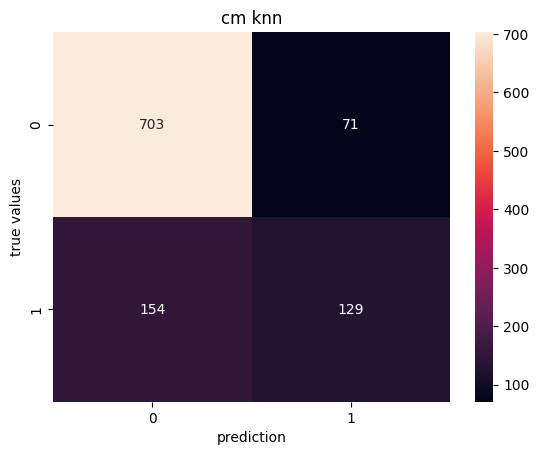

In [420]:
cm_knn = confusion_matrix(test_y ,knn_model.predict(test_x))
sns.heatmap(cm_knn, annot=True, fmt='d')
plt.title("cm knn")
plt.xlabel('prediction')
plt.ylabel('true values')

### для logr

Text(50.722222222222214, 0.5, 'true values')

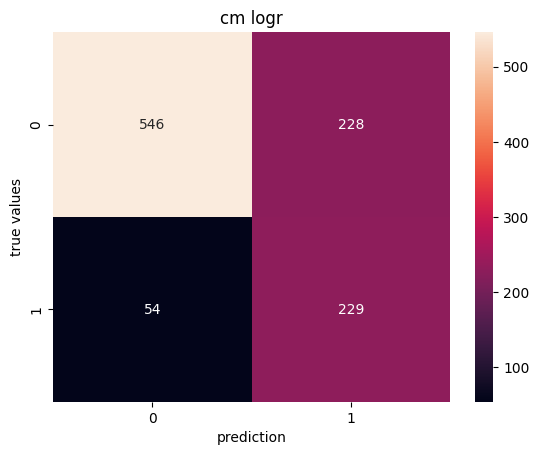

In [421]:
cm_logr = confusion_matrix(test_y ,logr_model.predict(test_x))
sns.heatmap(cm_logr, annot=True, fmt='d')
plt.title("cm logr")
plt.xlabel('prediction')
plt.ylabel('true values')

### для svc

Text(50.722222222222214, 0.5, 'true values')

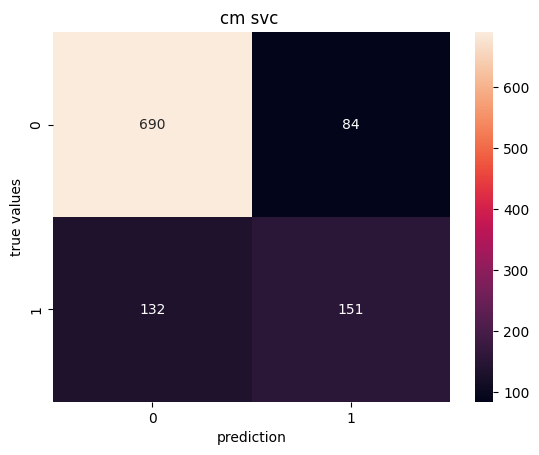

In [422]:
cm_svc = confusion_matrix(test_y ,svc_model.predict(test_x))
sns.heatmap(cm_svc, annot=True, fmt='d')
plt.title("cm svc ")
plt.xlabel('prediction')
plt.ylabel('true values')

# Обучение ансамблей моделей

### Обучение модели случайного леса

In [423]:
from sklearn.ensemble import RandomForestClassifier
rfc_model = RandomForestClassifier(max_depth=11, n_estimators=15, class_weight={1:4, 0:1})
rfc_model.fit(train_x, train_y)

RandomForestClassifier(class_weight={0: 1, 1: 4}, max_depth=11, n_estimators=15)

Получим предсказания модели на тестовой выборке и проверим качество модели на основе ROC_AUC

In [424]:
roc_auc_score(test_y, rfc_model.predict(test_x))

0.7458569589393815

### Обучение модели градиентного бустинга(scikit-learn)

In [425]:
from sklearn.ensemble import GradientBoostingClassifier

gbc_model = GradientBoostingClassifier(n_estimators=250)
gbc_model.fit(train_x, train_y)

GradientBoostingClassifier(n_estimators=250)

Получим предсказания модели на тестовой выборке и проверим качество модели на основе ROC_AUC

In [426]:
roc_auc_score(test_y, gbc_model.predict(test_x))

0.71911322942632

### Обучение модели градиентного бустинка(catboost)

In [427]:
from catboost import CatBoostClassifier

train_x_cb, test_x_cb, train_y_cb, test_y_cb = train_test_split(train.drop(columns=['Churn']), train["Churn"], test_size=0.2, shuffle=False)
cat_features = train_x_cb.select_dtypes(include=["object", "category"]).columns.tolist()

cb_model = CatBoostClassifier(iterations=50, learning_rate=0.1, verbose=False, class_weights=[1, 3])

cb_model.fit(train_x_cb, train_y_cb, cat_features=cat_features)

train_x_cb

,ClientPeriod,MonthlySpending,Sex,IsSeniorCitizen,HasPartner,HasChild,HasPhoneService,HasMultiplePhoneNumbers,HasInternetService,HasOnlineSecurityService,HasOnlineBackup,HasDeviceProtection,HasTechSupportAccess,HasOnlineTV,HasMovieSubscription,HasContractPhone,IsBillingPaperless,PaymentMethod
0,55,19.50,Male,0,Yes,Yes,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check
1,72,25.85,Male,0,Yes,No,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic)
2,1,75.90,Male,0,No,No,Yes,No,Fiber optic,No,No,No,Yes,No,No,Month-to-month,Yes,Electronic check
3,32,79.30,Female,1,Yes,No,Yes,Yes,Fiber optic,No,No,Yes,No,No,No,Month-to-month,No,Mailed check
4,60,115.25,Female,0,Yes,Yes,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Two year,No,Credit card (automatic)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4220,70,80.70,Female,0,Yes,Yes,Yes,Yes,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Electronic check
4221,5,90.35,Male,0,Yes,Yes,Yes,No,Fiber optic,Yes,No,Yes,No,No,Yes,Month-to-month,Yes,Mailed check
4222,17,54.60,Male,0,Yes,No,No,No phone service,DSL,No,No,Yes,Yes,Yes,Yes,One year,No,Electronic check
4223,19,39.65,Male,0,No,No,No,No phone service,DSL,No,No,Yes,No,Yes,No,Month-to-month,Yes,Electronic check


Получим предсказания модели на тестовой выборке и проверим качество модели на основе ROC_AUC

In [428]:
roc_auc_score(test_y, cb_model.predict(test_x_cb))

0.7685535194163677

получили значение 0.768(50)

# Построим матрицу ошибок для каждого ансамбля

### Для RandomForest

Text(50.722222222222214, 0.5, 'true values')

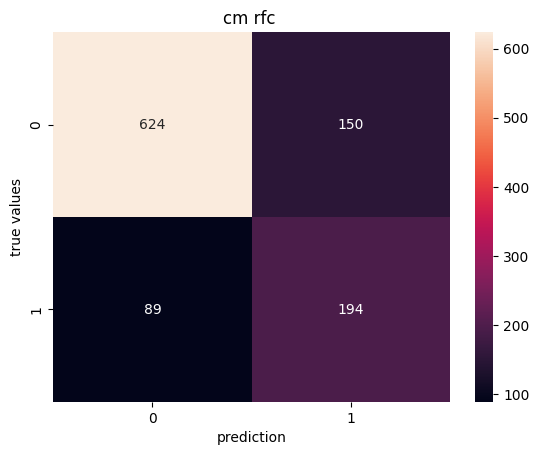

In [429]:
cm_rfc = confusion_matrix(test_y ,rfc_model.predict(test_x))
sns.heatmap(cm_rfc, annot=True, fmt='d')
plt.title("cm rfc ")
plt.xlabel('prediction')
plt.ylabel('true values')

Для GradientBoostig(sklearn)

Text(50.722222222222214, 0.5, 'true values')

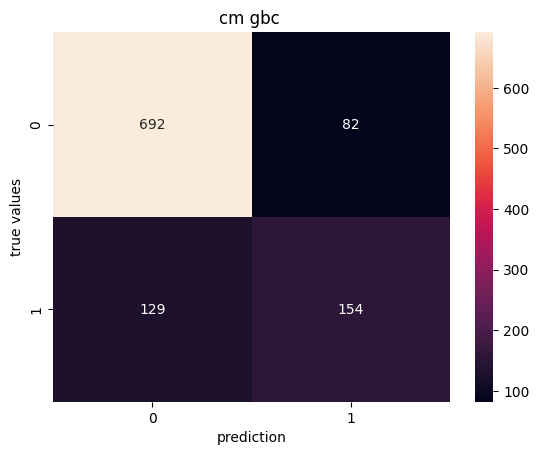

In [430]:
cm_gbc = confusion_matrix(test_y ,gbc_model.predict(test_x))
sns.heatmap(cm_gbc, annot=True, fmt='d')
plt.title("cm gbc ")
plt.xlabel('prediction')
plt.ylabel('true values')

Для GradientBoosting(catboost)

Text(50.722222222222214, 0.5, 'true values')

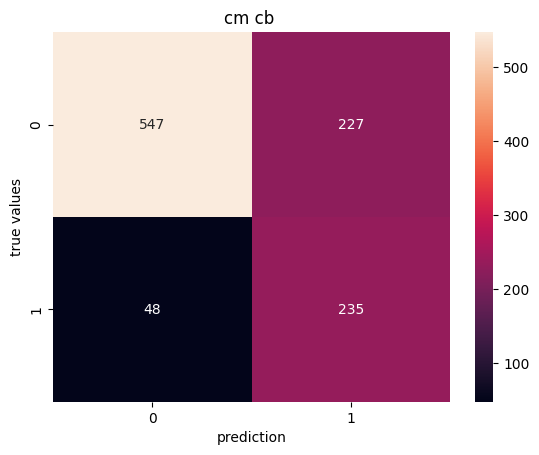

In [431]:
cm_cb = confusion_matrix(test_y ,cb_model.predict(test_x_cb))
sns.heatmap(cm_cb, annot=True, fmt='d')
plt.title("cm cb ")
plt.xlabel('prediction')
plt.ylabel('true values')

# Подготовим файлы на отправку

### Обработаем commit-выборку

In [432]:
check_commit = pd.read_csv("test.csv") #для контрольных предсказаний
check_commit.drop("TotalSpent", axis=1, inplace=True)

check_commit_encoded_np = preprocessor.transform(check_commit)

check_commit_encoded = pd.DataFrame(check_commit_encoded_np, columns=encoded_feature_names, index=check_commit.index)


### Предскажем значения knn для commit-выборки

In [433]:
knn_commit_predict = knn_model.predict(check_commit_encoded)

submission = pd.DataFrame({'Id': check_commit.index,
                           'Churn': knn_commit_predict})

submission.to_csv('submission_knn.csv', index=False)



### Предскажем значения logr для commit-выборки

In [434]:
logr_commit_predict = logr_model.predict(check_commit_encoded)

submission = pd.DataFrame({"Id": check_commit.index,
                          'Churn':logr_commit_predict})
submission.to_csv('submission_logr.csv', index=False)

### Предскажем значения SVC для commit-выборки

In [435]:
svc_commit_predict = svc_model.predict(check_commit_encoded)

submission = pd.DataFrame({"Id": check_commit.index,
                          'Churn':svc_commit_predict})
submission.to_csv('submission_svc.csv', index=False)

Для ансамблей

### Предскажем значения RFC для commit-выборки

In [436]:
rfc_commit_predict = rfc_model.predict(check_commit_encoded)

submission = pd.DataFrame({"Id": check_commit.index,
                          'Churn':rfc_commit_predict})
submission.to_csv('submission_rfc.csv', index=False)

### Предскажем значения GBC(sklearn) для commit_выборки

In [437]:
gbc_commit_predict = gbc_model.predict(check_commit_encoded)

submission = pd.DataFrame({"Id": check_commit.index,
                          'Churn':gbc_commit_predict})
submission.to_csv('submission_gbc.csv', index=False)

### Предскажем значения catboost для commit_выборки

In [438]:

cb_commit_predict = cb_model.predict(check_commit)

submission = pd.DataFrame({"Id": check_commit.index,
                          'Churn':cb_commit_predict})
submission.to_csv('submission_cb.csv', index=False)